# Global Disaster Analysis
**Student Name:** Alperen Sağlam - 150240715

**Student Name:** İbrahim Bancar - 150220313


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from utils import *
import os


In [2]:
os.makedirs("../images/01_eda", exist_ok=True)

In [3]:
# Load dataset
file_path = "../data/public_emdat_custom_request_2018-2024.xlsx"
df = pd.read_excel(file_path)

print(f"Data Shape: {df.shape}")
df.head(3)


Data Shape: (4014, 47)


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,GADM Admin Units,Entry Date,Last Update
0,2018-0040-BRA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),DFO:4576,NaN,BRA,...,NaN,NaN,NaN,10000.0,12492.0,80.049596,"[{""adm2_code"":9961,""adm2_name"":""Rio De Janeiro""}]","[{""gid_2"":""BRA.19.68_2"",""migration_date"":""2025...",2018-02-20,2025-12-20
1,2022-0770-RWA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,RWA,...,NaN,NaN,NaN,NaN,NaN,93.294607,"[{""adm1_code"":21970,""adm1_name"":""Kigali City/U...","[{""gid_1"":""RWA.5_1"",""migration_date"":""2025-12-...",2022-11-25,2025-12-20
2,2024-9796-USA,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,USA,...,NaN,NaN,NaN,5400000.0,5400000.0,100.000000,NaN,"[{""gid_1"":""USA.13_1"",""name_1"":""Idaho""},{""gid_1...",2024-10-29,2025-12-20


In [4]:
# General info
print("--- Info ---")
print(df.info()) 

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     4014 non-null   object 
 1   Historic                                   4014 non-null   object 
 2   Classification Key                         4014 non-null   object 
 3   Disaster Group                             4014 non-null   object 
 4   Disaster Subgroup                          4014 non-null   object 
 5   Disaster Type                              4014 non-null   object 
 6   Disaster Subtype                           4014 non-null   object 
 7   External IDs                               1156 non-null   object 
 8   Event Name                                 1252 non-null   object 
 9   ISO                                        4014 non-null   object 
 10  Country    

In [5]:
# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
External IDs                                 2858
Event Name                                   2762
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                      434
Origin                                       2759
Associated Types                             2829
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution ('000 US$

In [6]:
# Statistical summary
print("\n--- Statistics ---")
print(df.describe().T)


--- Statistics ---
                                            count          mean           std  \
AID Contribution ('000 US$)                   1.0  1.000000e+04           NaN   
Magnitude                                   624.0  2.243767e+04  7.800276e+04   
Latitude                                    256.0  1.642828e+01  2.167095e+01   
Longitude                                   256.0  4.644094e+01  7.174308e+01   
Start Year                                 4014.0  2.021098e+03  1.985503e+00   
Start Month                                3983.0  6.342204e+00  3.394406e+00   
Start Day                                  3696.0  1.514259e+01  9.087812e+00   
End Year                                   4014.0  2.021130e+03  1.989514e+00   
End Month                                  4005.0  6.634956e+00  3.406314e+00   
End Day                                    3737.0  1.600937e+01  9.029820e+00   
Total Deaths                               3118.0  1.289089e+02  1.209891e+03   
No. Inju

In [7]:
# Value counts
if "Disaster Type" in df.columns:
    print("\n--- Disaster Types ---")
    print(df["Disaster Type"].value_counts())


--- Disaster Types ---
Disaster Type
Flood                               1227
Storm                                839
Road                                 356
Water                                272
Extreme temperature                  191
Earthquake                           172
Mass movement (wet)                  141
Epidemic                             121
Fire (Miscellaneous)                 117
Drought                              109
Wildfire                             105
Air                                   57
Explosion (Industrial)                49
Volcanic activity                     41
Collapse (Industrial)                 40
Miscellaneous accident (General)      36
Collapse (Miscellaneous)              31
Rail                                  31
Explosion (Miscellaneous)             24
Fire (Industrial)                     18
Industrial accident (General)         11
Infestation                           10
Gas leak                               8
Glacial lake outbur

In [8]:
# Ensure numeric
for c in ["Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Fill missing month/day to create a valid date:
df["start_month_f"] = df["Start Month"].fillna(1).astype(int)
df["start_day_f"]   = df["Start Day"].fillna(1).astype(int)

df["event_start_date"] = pd.to_datetime(
    dict(year=df["Start Year"].astype(int), month=df["start_month_f"], day=df["start_day_f"]),
    errors="coerce"
)

# Useful temporal features
df["year"] = df["event_start_date"].dt.year
df["month"] = df["event_start_date"].dt.month

print("Start date range:",
      df["event_start_date"].min().date(),
      "to",
      df["event_start_date"].max().date())

df[["event_start_date", "year", "month", "Start Year", "Start Month", "Start Day"]].head()


Start date range: 2018-01-01 to 2024-12-31


,event_start_date,year,month,Start Year,Start Month,Start Day
0,2018-02-14,2018,2,2018,2.0,14.0
1,2022-11-17,2022,11,2022,11.0,17.0
2,2024-01-01,2024,1,2024,1.0,NaN
3,2022-08-31,2022,8,2022,8.0,31.0
4,2022-09-08,2022,9,2022,9.0,8.0


In [9]:
print("Number of unique disaster types:")
print(df["Disaster Type"].nunique())

print("\nTop 10 most frequent disaster types:")
print(df["Disaster Type"].value_counts().head(5))


Number of unique disaster types:
26

Top 10 most frequent disaster types:
Disaster Type
Flood                  1227
Storm                   839
Road                    356
Water                   272
Extreme temperature     191
Name: count, dtype: int64


In [10]:
print("\nNumber of unique countries:")
print(df["Country"].nunique())

print("\nTop 10 most affected countries by event count:")
print(df["Country"].value_counts().head(10))



Number of unique countries:
195

Top 10 most affected countries by event count:
Country
United States of America            201
India                               175
Indonesia                           173
China                               170
Philippines                         111
Pakistan                             90
Brazil                               88
Democratic Republic of the Congo     88
Nigeria                              78
Mexico                               72
Name: count, dtype: int64


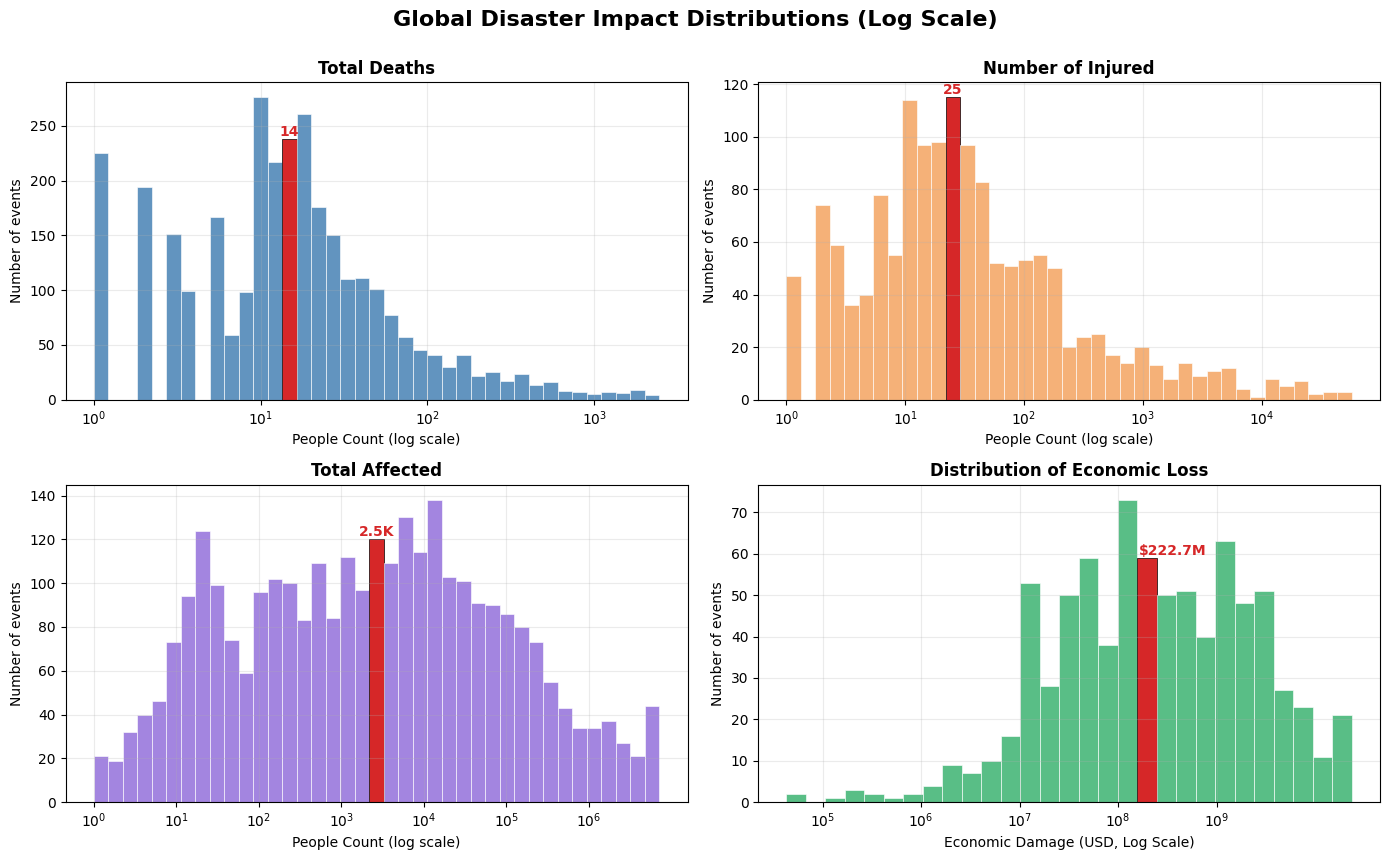

In [11]:
# Senin kodun (Aynen çalıştır):
fig, axes = plt.subplots(2, 2, figsize=(14, 9))
axes = axes.flatten()

ticks_people = [1, 10, 100, 1_000, 10_000, 100_000, 1_000_000]
ticks_usd    = [1_000, 10_000, 100_000, 1_000_000, 10_000_000, 100_000_000, 1_000_000_000]

# 1. Total Deaths
plot_hist_log_highlight_median(
    axes[0], df["Total Deaths"], "Total Deaths",
    "People Count (log scale)", ticks_people, color="#4682B4"
)

# 2. Number of Injured
plot_hist_log_highlight_median(
    axes[1], df["No. Injured"], "Number of Injured",
    "People Count (log scale)", ticks_people, color="#F4A460"
)

# 3. Total Affected
plot_hist_log_highlight_median(
    axes[2], df["Total Affected"], "Total Affected",
    "People Count (log scale)", ticks_people, color="#9370DB"
)

# 4. Economic Loss
plot_hist_log_highlight_median(
    ax=axes[3],
    s_raw=df["Total Damage, Adjusted ('000 US$)"] * 1000,
    title="Distribution of Economic Loss",
    xlabel="Economic Damage (USD, Log Scale)",
    ticks_raw=ticks_usd, prefix="$", bins_n=30,
    text_offset_factor=1.8,
    color="#3CB371"
)

fig.suptitle('Global Disaster Impact Distributions (Log Scale)', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('../images/01_eda/global_disaster_impact_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

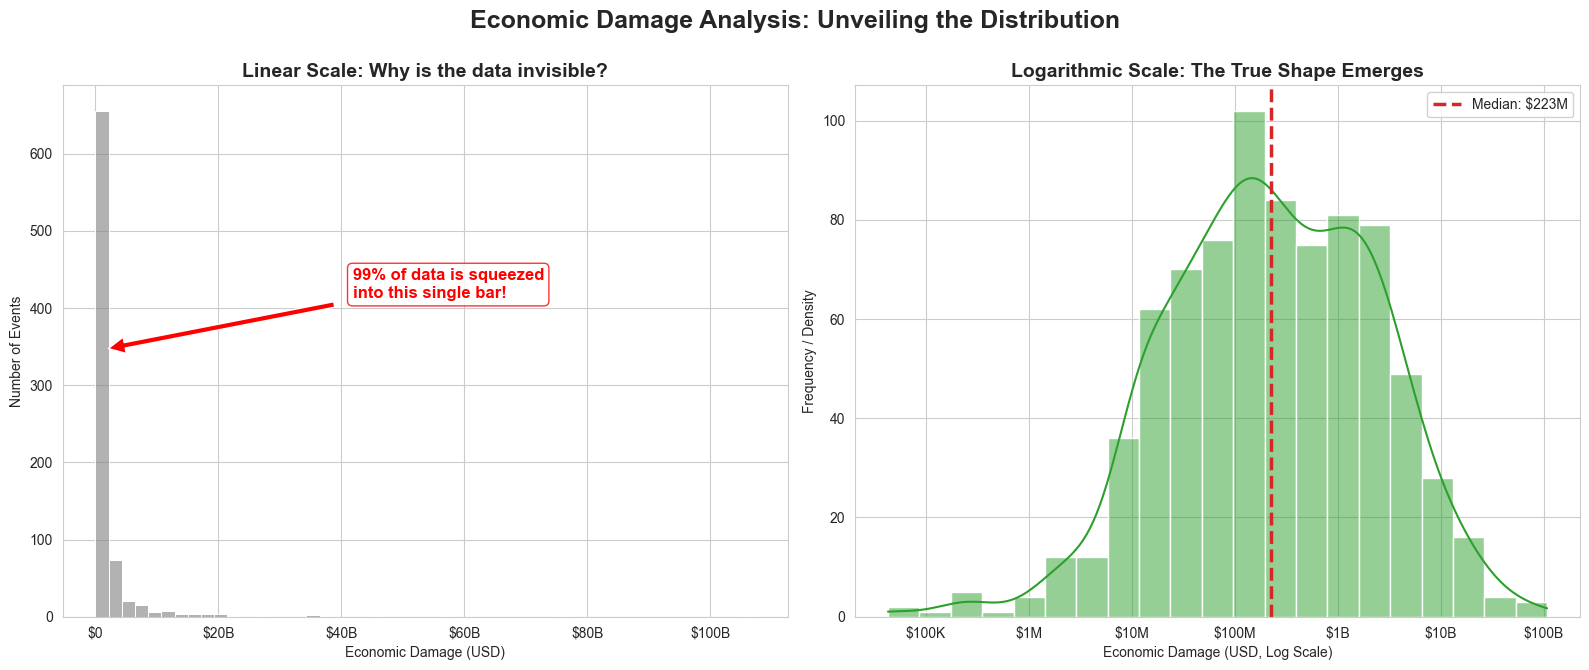

In [12]:
formatter = ticker.FuncFormatter(currency_format)

# Prepare economic damage data in USD
data = df["Total Damage, Adjusted ('000 US$)"].dropna() * 1000
# Keep positive values for log scale
data = data[data > 0]

# Set visualization style
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Linear-scale histogram
sns.histplot(
    data,
    bins=50,
    ax=axes[0],
    color='gray',
    alpha=0.6,
    edgecolor='white'
)

# Set titles and labels for linear plot
axes[0].set_title("Linear Scale: Why is the data invisible?", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Economic Damage (USD)")
axes[0].set_ylabel("Number of Events")
axes[0].xaxis.set_major_formatter(formatter)

# Annotate compressed distribution
axes[0].annotate(
    '99% of data is squeezed\ninto this single bar!',
    xy=(0, axes[0].get_ylim()[1] * 0.5),
    xytext=(0.4, 0.6),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='red', shrink=0.05),
    fontsize=12,
    color='red',
    fontweight='bold',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8)
)

# Log-scale histogram with density curve
sns.histplot(
    data,
    ax=axes[1],
    log_scale=True,
    kde=True,
    color='#2ca02c',
    alpha=0.5,
    edgecolor='white'
)

# Compute median value
median_val = data.median()

# Draw median reference line
axes[1].axvline(
    median_val,
    color='#d62728',
    linestyle='--',
    linewidth=2.5,
    label=f'Median: {currency_format(median_val, 0)}'
)

# Set titles and labels for log plot
axes[1].set_title("Logarithmic Scale: The True Shape Emerges", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Economic Damage (USD, Log Scale)")
axes[1].set_ylabel("Frequency / Density")
axes[1].xaxis.set_major_formatter(formatter)
axes[1].legend(loc='upper right', frameon=True, framealpha=0.9)

# Set overall title and layout
plt.suptitle("Economic Damage Analysis: Unveiling the Distribution", fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('../images/01_eda/economic_damage_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [13]:
# Define numerical columns to analyze for outliers
outlier_cols = {
    "Total Deaths": df["Total Deaths"],
    "No. Injured": df["No. Injured"],
    "Total Affected": df["Total Affected"],
    "Economic Loss (USD)": df["Total Damage, Adjusted ('000 US$)"] * 1000
}

# Store summary statistics for each variable
summary = []

for name, s_raw in outlier_cols.items():
    # Convert values to numeric and drop invalid entries
    s = pd.to_numeric(s_raw, errors="coerce").dropna()
    # Keep only positive values
    s = s[s > 0]

    # Skip variables with no valid data
    if len(s) == 0:
        continue

    # Compute percentile-based thresholds
    p95 = np.percentile(s, 95)
    p99 = np.percentile(s, 99)
    # Get maximum observed value
    max_val = s.max()

    # Total number of observations
    n = len(s)
    # Count values above 95th percentile
    n_p95 = (s > p95).sum()
    # Count values above 99th percentile
    n_p99 = (s > p99).sum()

    # Append computed statistics to summary list
    summary.append({
        "Variable": name,
        "Count": n,
        "P95": p95,
        "P99": p99,
        "Max": max_val,
        "Events > P95 (%)": 100 * n_p95 / n,
        "Events > P99 (%)": 100 * n_p99 / n
    })

# Create a DataFrame summarizing outlier statistics
outlier_summary = pd.DataFrame(summary)
outlier_summary

,Variable,Count,P95,P99,Max,Events > P95 (%),Events > P99 (%)
0,Total Deaths,3118,2.481500e+02,2.454320e+03,5.300000e+04,5.003207,1.026299
1,No. Injured,1489,2.982600e+03,5.746104e+04,4.615420e+05,5.036938,1.007388
2,Total Affected,2994,1.028388e+06,7.107000e+06,3.301286e+07,5.010020,1.002004
3,Economic Loss (USD),802,7.604116e+09,2.355399e+10,1.071873e+11,5.112219,1.122195


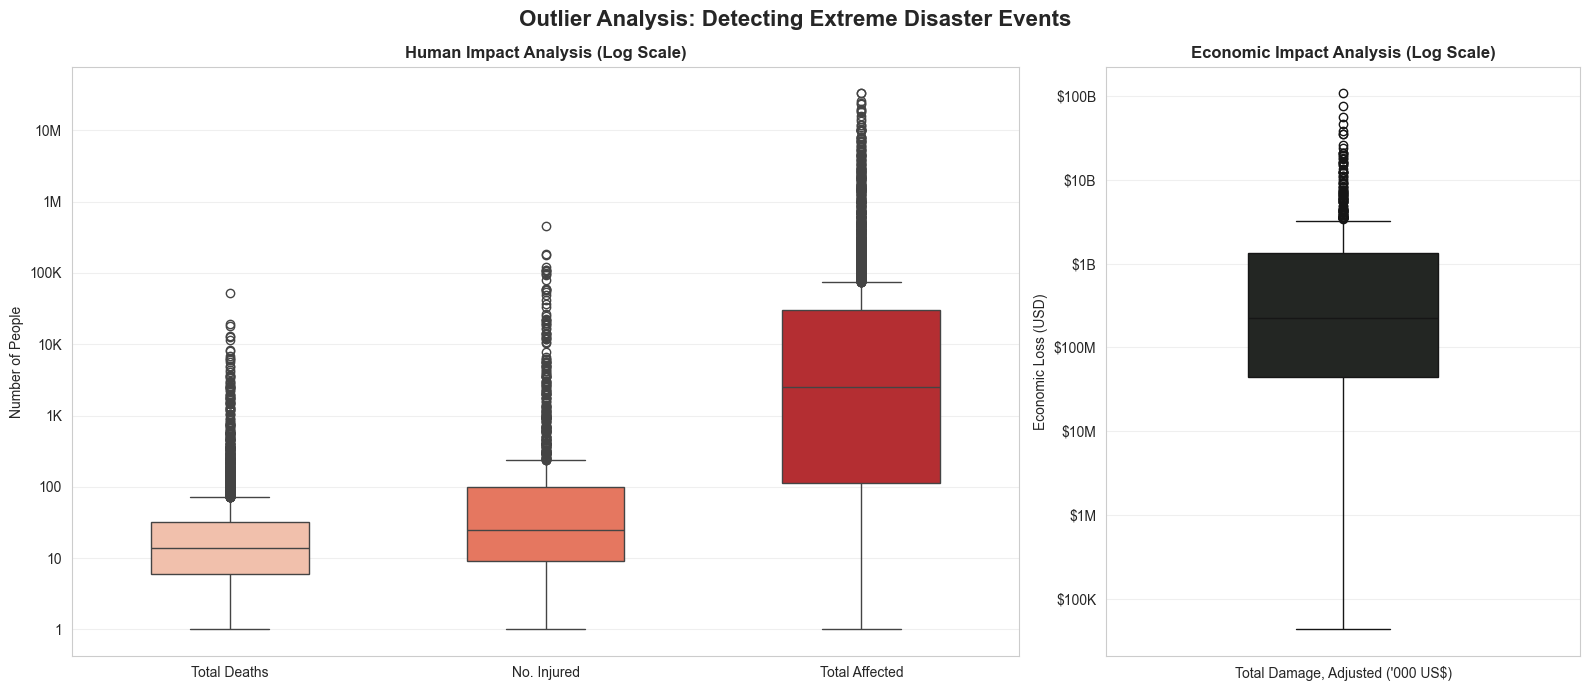

In [14]:
# Convert to long format for seaborn
df_human = pd.melt(
    df,
    value_vars=["Total Deaths", "No. Injured", "Total Affected"],
    var_name="Metric",
    value_name="Value"
)
df_econ = pd.melt(
    df,
    value_vars=["Total Damage, Adjusted ('000 US$)"],
    var_name="Metric",
    value_name="Value"
)

# Convert economic values to USD and keep positives
df_econ["Value"] = df_econ["Value"] * 1000
df_econ = df_econ[df_econ["Value"] > 0]
# Keep only positive human values
df_human = df_human[df_human["Value"] > 0]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={'width_ratios': [2, 1]})

# Human impact boxplot with hue to avoid palette warning
sns.boxplot(
    data=df_human,
    x="Metric",
    y="Value",
    hue="Metric",
    ax=axes[0],
    palette="Reds",
    showfliers=True,
    width=0.5,
    legend=False
)
# Use log scale for heavy-tailed data
axes[0].set_yscale("log")
# Set titles and labels
axes[0].set_title("Human Impact Analysis (Log Scale)", fontweight="bold")
axes[0].set_ylabel("Number of People")
axes[0].set_xlabel("")
# Format y-axis ticks
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
# Enable grid
axes[0].grid(True, axis="y", alpha=0.3, which="major")

# Economic impact boxplot
sns.boxplot(
    data=df_econ,
    x="Metric",
    y="Value",
    hue="Metric",
    ax=axes[1],
    palette="dark:#2ca02c",
    showfliers=True,
    width=0.4,
    legend=False
)

# Use log scale for economic loss
axes[1].set_yscale("log")
# Set titles and labels
axes[1].set_title("Economic Impact Analysis (Log Scale)", fontweight="bold")
axes[1].set_ylabel("Economic Loss (USD)")
axes[1].set_xlabel("")
# Format y-axis as currency
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(currency_format))
# Enable grid
axes[1].grid(True, axis="y", alpha=0.3, which="major")

# Add overall title
plt.suptitle("Outlier Analysis: Detecting Extreme Disaster Events", fontsize=16, fontweight="bold", y=0.98)
# Adjust layout
plt.tight_layout()
plt.savefig('../images/01_eda/outlier_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


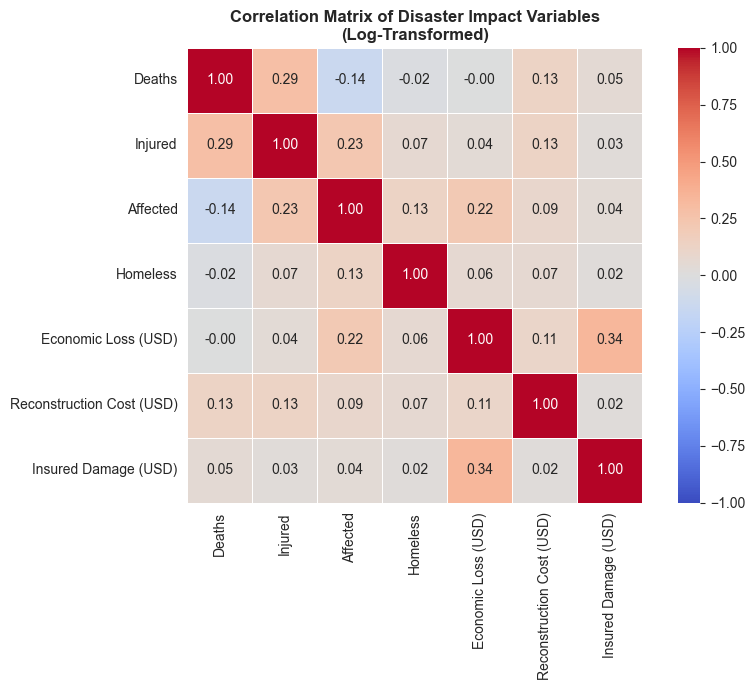

In [15]:

# Extended Correlation Matrix (Log-Transformed)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = {
    "Deaths": df["Total Deaths"],
    "Injured": df["No. Injured"],
    "Affected": df["Total Affected"],
    "Homeless": df["No. Homeless"],
    "Economic Loss (USD)": df["Total Damage, Adjusted ('000 US$)"] * 1000,
    "Reconstruction Cost (USD)": df["Reconstruction Costs, Adjusted ('000 US$)"] * 1000,
    "Insured Damage (USD)": df["Insured Damage, Adjusted ('000 US$)"] * 1000
}

corr_df = pd.DataFrame()

for name, s_raw in corr_cols.items():
    s = pd.to_numeric(s_raw, errors="coerce").fillna(0)
    corr_df[name] = np.log1p(s)

# Correlation matrix
corr_matrix = corr_df.corr(method="pearson")

# Plot
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    center= 0
)

plt.title(
    "Correlation Matrix of Disaster Impact Variables\n(Log-Transformed)",
    fontweight="bold"
)
plt.tight_layout()
plt.savefig('../images/01_eda/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


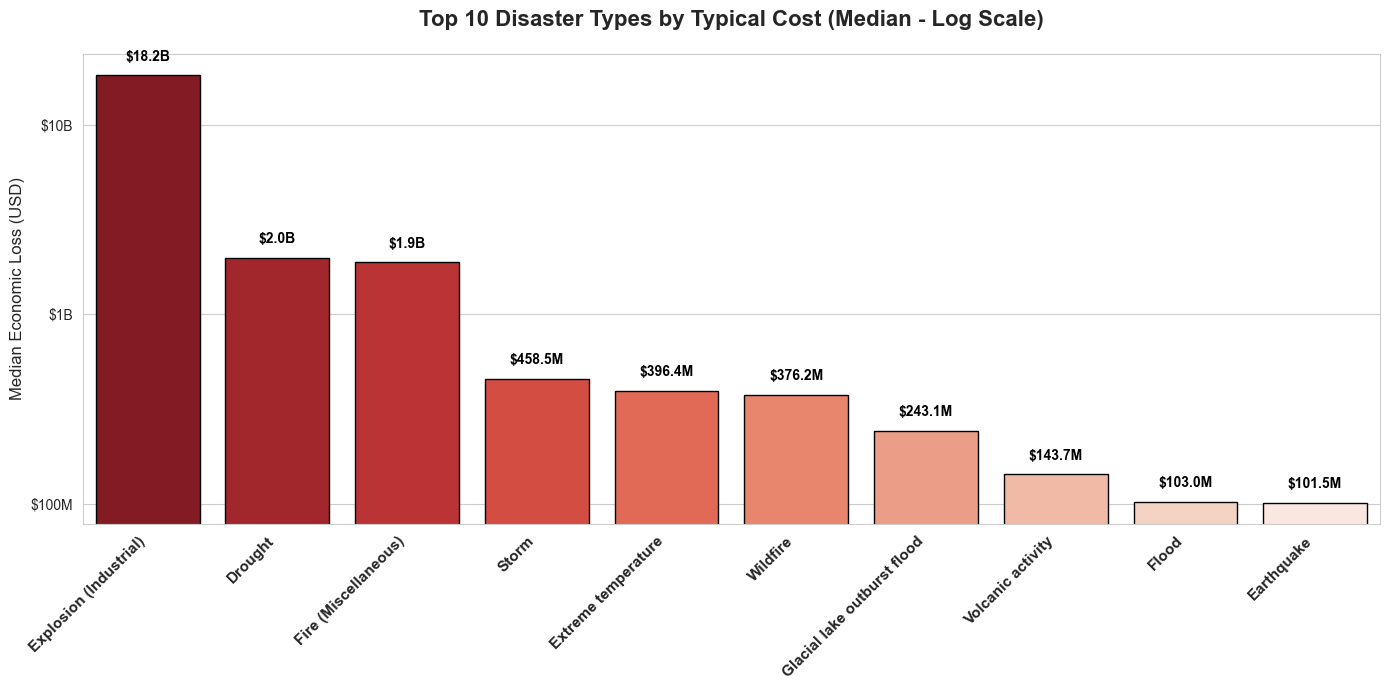

In [16]:
# Prepare median economic loss per disaster type in USD
impact_by_type = (
    df.assign(econ_loss_usd=df["Total Damage, Adjusted ('000 US$)"] * 1000)
      .groupby("Disaster Type")["econ_loss_usd"]
      .median()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

# Create a wide figure to fit category labels
plt.figure(figsize=(14, 7))
# Enable grid background for readability
sns.set_style("whitegrid")

# Draw vertical bar plot with hue to avoid seaborn FutureWarning
ax = sns.barplot(
    data=impact_by_type,
    x="Disaster Type",
    y="econ_loss_usd",
    hue="Disaster Type",
    palette="Reds_r",
    edgecolor="black",
    legend=False
)

# Apply logarithmic scale on y-axis
ax.set_yscale("log")

# Format y-axis values as currency
ax.yaxis.set_major_formatter(ticker.FuncFormatter(currency_format))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=11, fontweight='bold')

# Annotate bars with median values
for i, v in enumerate(impact_by_type["econ_loss_usd"]):
    ax.text(
        i,
        v * 1.15,
        currency_format2(v, 0),
        color='black',
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=10
    )

# Set plot title
plt.title(
    "Top 10 Disaster Types by Typical Cost (Median - Log Scale)",
    fontsize=16,
    fontweight='bold',
    pad=20
)

plt.xlabel("")
# Label y-axis
plt.ylabel("Median Economic Loss (USD)", fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('../images/01_eda/top10_disaster_types_by_cost.png', dpi=300, bbox_inches='tight')
plt.show()
